In [3]:
import numpy as np 
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib._color_data as mcd
import seaborn as sns

from collections import defaultdict
%matplotlib inline


In [4]:
data = {}

data['circuits'] = pd.read_csv('Formula1_data/circuits.csv')
#Id, reference name, name, loc
data['constructor_results'] = pd.read_csv('Formula1_data/constructor_results.csv')
#constuctorId, raceId, points
data['constructor_standings'] = pd.read_csv('Formula1_data/constructor_standings.csv')
#stanidingsId, raceId, constructorId, points, position, wins
data['constructors'] = pd.read_csv('Formula1_data/constructors.csv')
#id, name, nationality
data['driver_standings'] = pd.read_csv('Formula1_data/driver_standings.csv')
#id, raceId, driverId, points, position, wins
data['drivers'] = pd.read_csv('Formula1_data/drivers.csv')
#id, name, number, DOB and other detaiils
data['lap_times'] = pd.read_csv('Formula1_data/lap_times.csv')
#raceId, DriverID, lap, pooision, time
data['pit_stops'] = pd.read_csv('Formula1_data/pit_stops.csv')
#raceId, driverID, stop number, time, duration
data['qualifying'] = pd.read_csv('Formula1_data/qualifying.csv')
#qualiId, raceId, driverId, constructorId, number, position, times (3 qualifying)
data['races'] = pd.read_csv('Formula1_data/races.csv')
#Id, year, round, circuitId, name, date, time
data['results'] = pd.read_csv('Formula1_data/results.csv')
#resultId, raceId, driverId, ConstructorId, number, grid, position, position order, points. laps, time, fastest lap time, fastest lap speed
data['status'] = pd.read_csv('Formula1_data/status.csv')
#statusId, status(finished, dsq, engine issue etc.)

In [5]:
monzares = data['races'][data['races'].name == 'Italian Grand Prix']
ids = list(monzares.raceId)
r = defaultdict(lambda : 0)
for i in ids:
    r[i] = 1
mr = data['results']
fl = defaultdict(list)
for i in range(len(data['results'])):
    if r[data['results'].loc[i, 'raceId']]:
        fl[data['results'].loc[i, 'raceId']].append(data['results'].loc[i, 'fastestLapTime'])
tfl = dict()
for i in fl.keys():
    tfl[i] = min(fl[i])
tffl = dict()
for i in tfl.keys():
    if tfl[i]!= '\\N':
        tffl[i] = tfl[i]
from datetime import datetime
datetime.strptime(tffl[31], "%M:%S.%f")

times = []
for i in tffl.keys():
    times.append(datetime.strptime(tffl[i], "%M:%S.%f"))


In [6]:
ids  = list(tffl.keys())
years = dict()
for i in ids:
    years[i] = int(data['races'][data['races'].raceId == i].year)
year = []
for i in tffl.keys():
    year.append(years[i])
yt = []
for i in range(len(year)):
    yt.append([year[i], times[i]])
yt.sort(key = lambda x:x[0])
ys = []
ts = []
for i in yt:
    ys.append(i[0])
    ts.append(i[1])


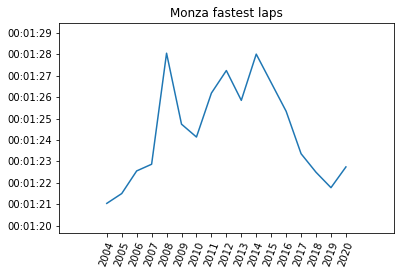

In [12]:
plt.plot(ys,ts)
plt.title("Monza fastest laps")
plt.xticks(ys)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=70)
plt.show()
# Tweak spacing to prevent clipping of tick-labels